# 1) Import libraries and dataset

In [1]:
# data analysis and scientific computing
import numpy as np  
import pandas as pd  

# Data visualization 
import matplotlib.pyplot as plt  
import seaborn as sns 

# ML regression models from sklearn
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# ML Splitting Dataset
from sklearn.model_selection import train_test_split

# ML Perfomance metrics
from sklearn.metrics import r2_score,mean_squared_error

# Save models
import joblib

In [2]:
data = pd.read_csv(r"../Dataset_5.csv")

# 2) Data Preprocessing

### Handling missing values

In [3]:
data.isnull().any().sum()

0

### Handling Catergorical values

In [4]:
obj=data.select_dtypes(include='object').columns
for i in obj:
    print(data[i].unique())

['female' 'male']
['yes' 'no']
['southwest' 'southeast' 'northwest' 'northeast']


# 3) Exploratory data analysis

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   claim     1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
data.head()  # Print first 5 entry of the dataset

,age,sex,bmi,children,smoker,region,claim
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
data.tail()  # Prints last 5 entries of the dataset

,age,sex,bmi,children,smoker,region,claim
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [11]:
data.describe(include='all').transpose()  # Print table which contain statistical data of the dataset

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,1338.0,NaN,NaN,NaN,39.207025,14.04996,18.0,27.0,39.0,51.0,64.0
sex,1338,2,male,676,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bmi,1338.0,NaN,NaN,NaN,30.663397,6.098187,15.96,26.29625,30.4,34.69375,53.13
children,1338.0,NaN,NaN,NaN,1.094918,1.205493,0.0,0.0,1.0,2.0,5.0
smoker,1338,2,no,1064,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,1338,4,southeast,364,NaN,NaN,NaN,NaN,NaN,NaN,NaN
claim,1338.0,NaN,NaN,NaN,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


### Correlation of Columns(Attributes)

In [12]:
data.corr()

C:\Users\siddh\AppData\Local\Temp\ipykernel_7600\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,age,bmi,children,claim
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
claim,0.299008,0.198341,0.067998,1.000000


C:\Users\siddh\AppData\Local\Temp\ipykernel_7600\3484622620.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=data.corr(), annot=True, linewidths=.5, ax=axes)


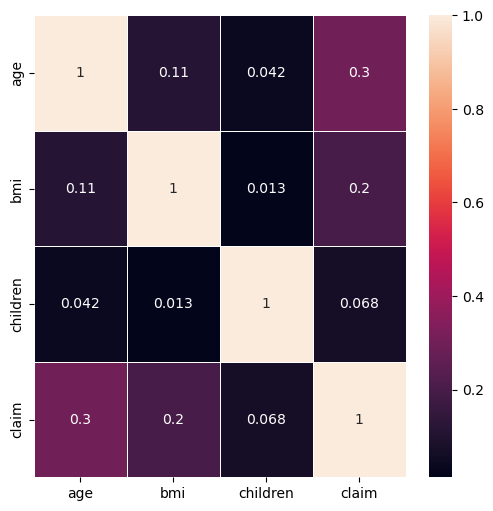

In [14]:
fig, axes = plt.subplots(figsize=(6,6)) 
sns.heatmap(data=data.corr(), annot=True, linewidths=.5, ax=axes) 
plt.show() 

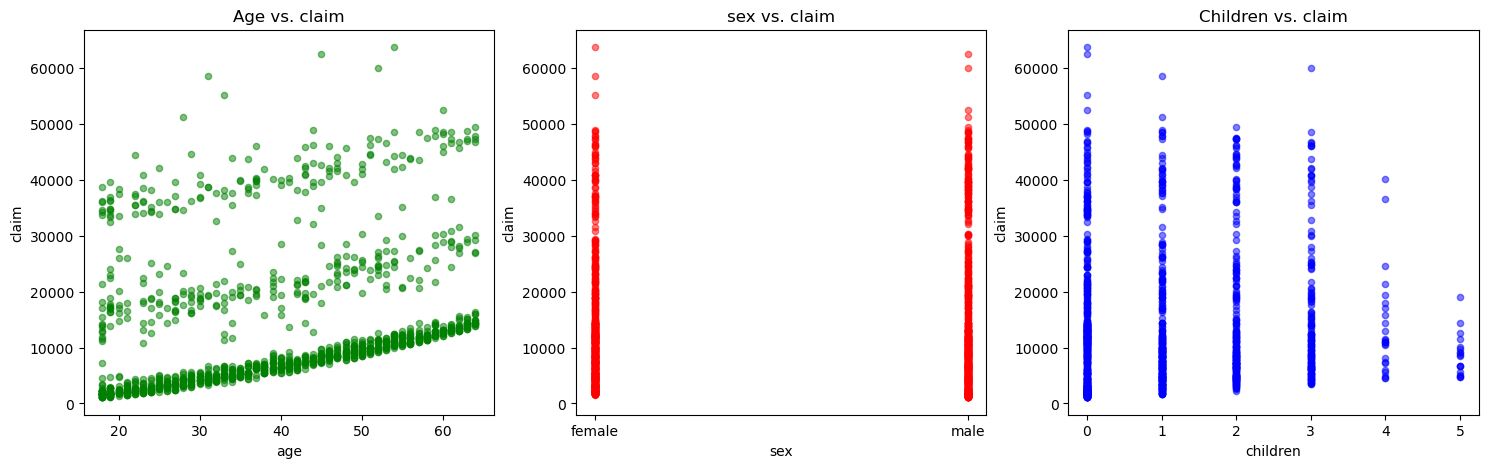

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))
data.plot(kind='scatter', x='age', y='claim', alpha=0.5, color='green', ax=axes[0], title="Age vs. claim")
data.plot(kind='scatter', x='sex', y='claim', alpha=0.5, color='red', ax=axes[1], title="sex vs. claim")
data.plot(kind='scatter', x='children', y='claim', alpha=0.5, color='blue', ax=axes[2], title="Children vs. claim")
plt.show()

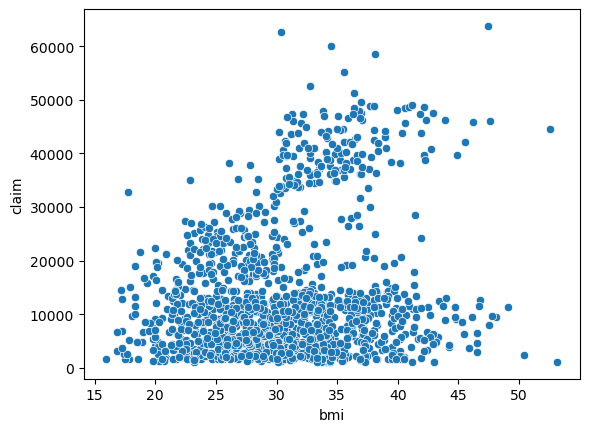

In [23]:
sns.scatterplot(x="bmi", y="claim", data=data)
plt.savefig("bmiVSclaim.png")

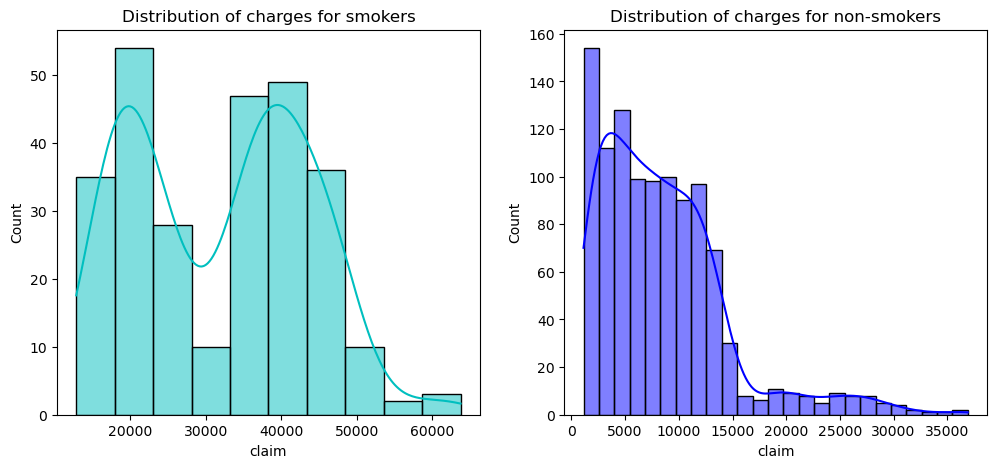

In [37]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.histplot(data[(data.smoker == 'yes')]["claim"],color='c',ax=ax,kde=True)
ax.set_title('Distribution of charges for smokers')

ax=f.add_subplot(122)
sns.histplot(data[(data.smoker == 'no')]['claim'],color='b',ax=ax,kde=True)
ax.set_title('Distribution of charges for non-smokers')
plt.savefig("DistributionOFcharges_forSmoker.png")

<Figure size 800x800 with 0 Axes>

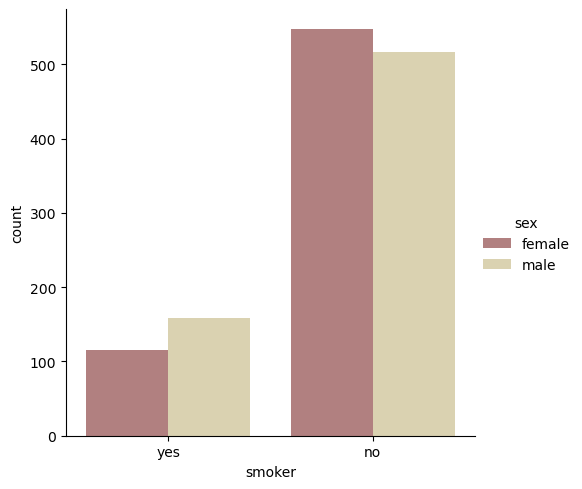

In [40]:
plt.figure(figsize=(8,8))
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="pink", data=data)
plt.savefig("Smoker_Countplot.png")
plt.show()

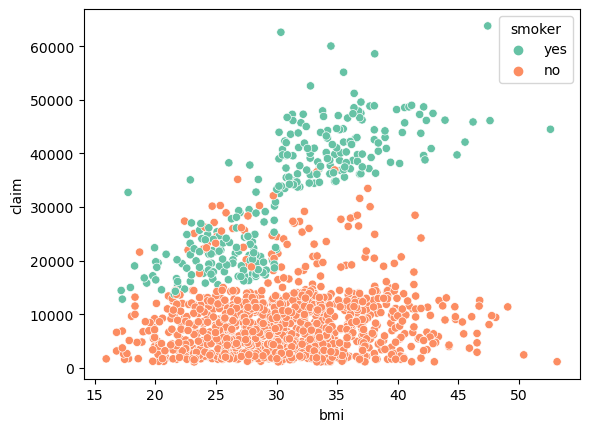

In [24]:
sns.scatterplot(x="bmi", y="claim", data=data, palette='Set2', hue='smoker')
plt.savefig("bmiVSclaim_Smoker.png")
plt.show()


C:\Users\siddh\AppData\Local\Temp\ipykernel_7600\1931336991.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["age"], color = 'g')


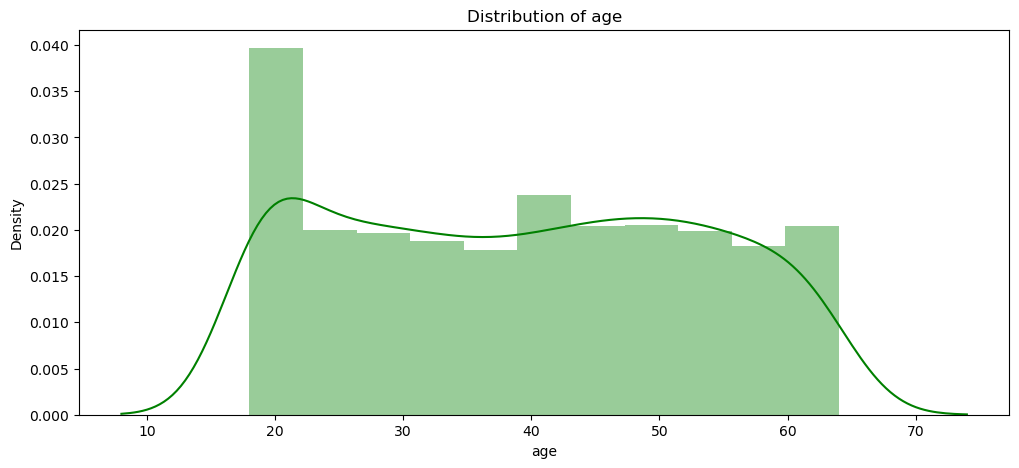

In [53]:
plt.figure(figsize=(12,5))
plt.title("Distribution of age")
sns.distplot(data["age"], color = 'g')
plt.savefig("Distribution_Age.png")
plt.show()

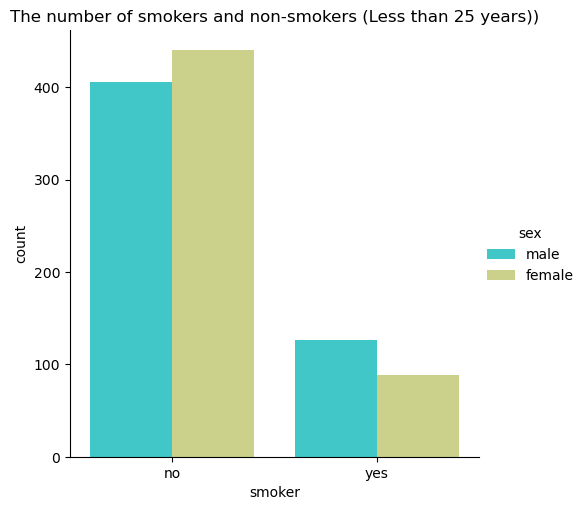

In [54]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="rainbow", data=data[(data.age >= 25)])
plt.title("The number of smokers and non-smokers (Less than 25 years))")
plt.savefig("Smoker_WithBelowAge25.png")


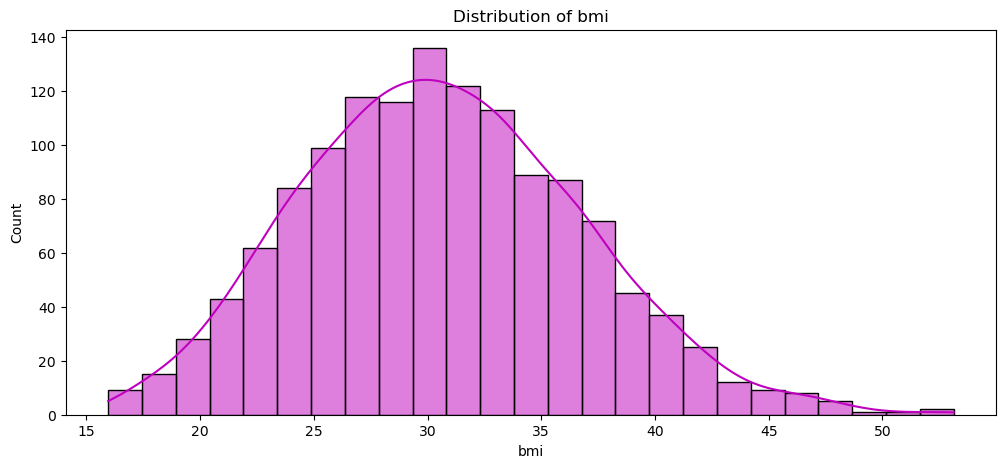

In [69]:
plt.figure(figsize=(12,5))
plt.title("Distribution of bmi")
ax = sns.histplot(data["bmi"], color = 'm',kde=True)
plt.savefig("Distribution_of_BMI.png")


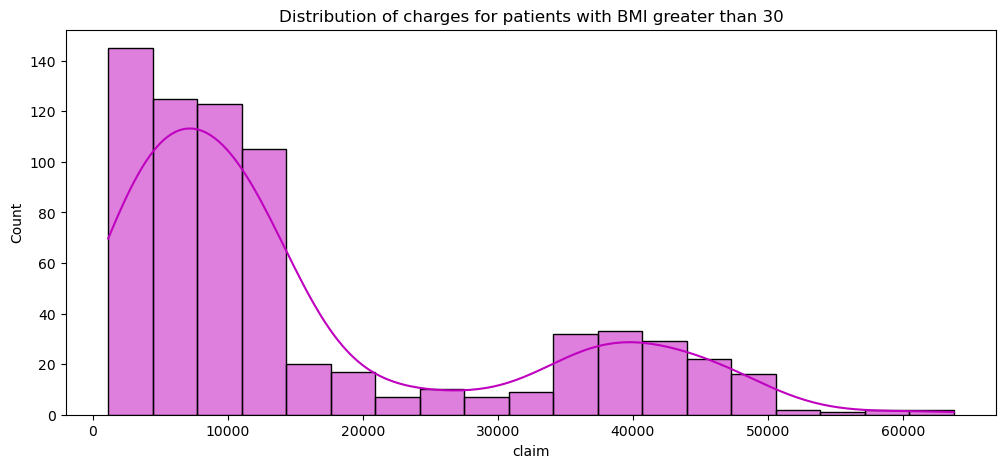

In [70]:
plt.figure(figsize=(12,5))
plt.title("Distribution of charges for patients with BMI greater than 30")
ax = sns.histplot(data[(data.bmi >= 30)]['claim'], color = 'm',kde=True)
plt.savefig("Distribution_of_BMI_GT 30.png")


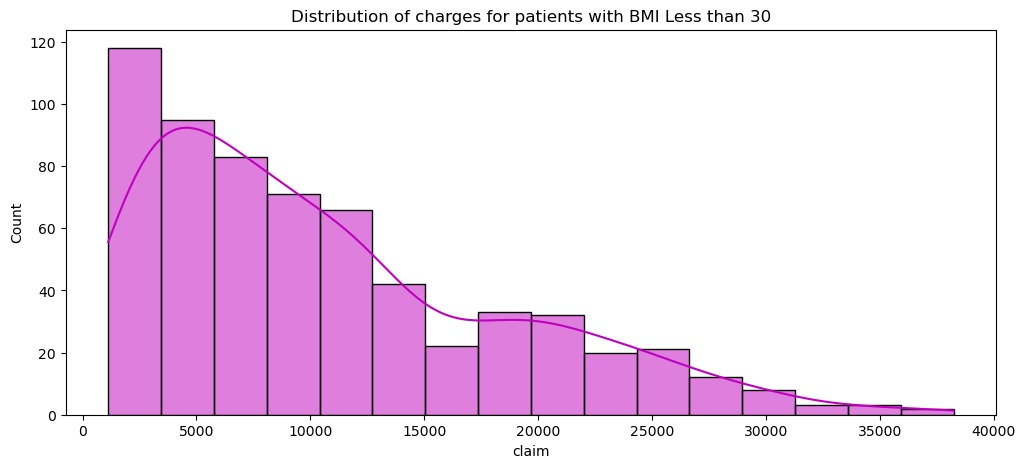

In [71]:
plt.figure(figsize=(12,5))
plt.title("Distribution of charges for patients with BMI Less than 30")
ax = sns.histplot(data[(data.bmi < 30)]['claim'], color = 'm',kde=True)
plt.savefig("Distribution_of_BMI_LT 30.png")

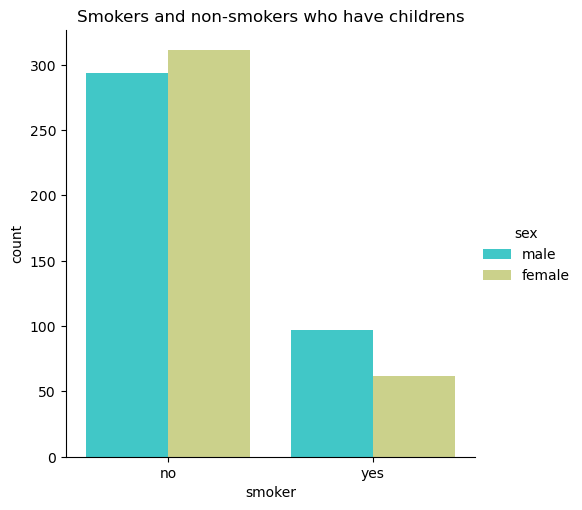

In [78]:
sns.catplot(x="smoker", kind="count", palette="rainbow",hue = "sex",
            data=data[(data.children > 0)])
plt.title('Smokers and non-smokers who have childrens')
plt.savefig("ChildrensCounts_Smoker.png")
plt.show()

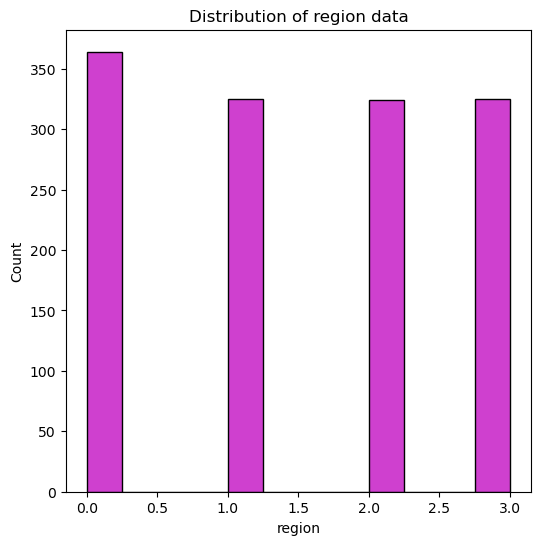

In [90]:
plt.figure(figsize=(6,6))
plt.title("Distribution of region data")
ax = sns.histplot(data['region'], color = 'm')
plt.savefig("Distribution_of_region_data.png")


## Type Conversions and Encoding

In [91]:
# encoding sex column
data.replace({'sex':{'male':0,'female':1}}, inplace=True)

# encoding 'smoker' column
data.replace({'smoker':{'yes':0,'no':1}}, inplace=True) 

# encoding 'region' column
data.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

In [92]:
# Independent features selection
X=data.drop(['claim'],axis=1)

In [93]:
# Dependent feature is charges spend on treatment
y=data['claim']

# 4) Building the model

### Splitting dataset

In [94]:
from sklearn.model_selection import train_test_split

In [95]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [96]:
Linear_Regression=LinearRegression()
Decision_Tree_Regressor=DecisionTreeRegressor()
Random_Forest_Regressor=RandomForestRegressor()
Gradient_Boosting_Regressor=GradientBoostingRegressor()

In [103]:
models=[GradientBoostingRegressor(),LinearRegression(),DecisionTreeRegressor(),RandomForestRegressor()]
modelDF=pd.DataFrame(columns=['Gradient_Boosting_Regressor','Linear_Regression','Decision_Tree_Regressor','Random_Forest_Regressor'])
print("Selected Models r2_score with Training and Testing data")
print("-"*50)
for model in models:
    x=model
    m=x.fit(X_train,y_train)
    y_pred=m.predict(X_train)
    y_pred1=m.predict(X_test)
    print(model,"Traning_Data","**" , r2_score(y_train,y_pred)*100,"% **")
    print(model,"Testing_Data","**" , r2_score(y_test,y_pred1)*100,"% **")
    print("-"*50)

Selected Models r2_score with Training and Testing data
--------------------------------------------------
GradientBoostingRegressor() Traning_Data ** 90.41116122925905 % **
GradientBoostingRegressor() Testing_Data ** 86.8041434049907 % **
--------------------------------------------------
LinearRegression() Traning_Data ** 74.18272241542367 % **
LinearRegression() Testing_Data ** 76.9431507730008 % **
--------------------------------------------------
DecisionTreeRegressor() Traning_Data ** 100.0 % **
DecisionTreeRegressor() Testing_Data ** 72.27288963852743 % **
--------------------------------------------------
RandomForestRegressor() Traning_Data ** 97.6301025829597 % **
RandomForestRegressor() Testing_Data ** 85.32620447315281 % **
--------------------------------------------------


In [106]:
from sklearn.model_selection import cross_val_score

modelDF=pd.DataFrame(columns=['Gradient_Boosting_Regressor','Linear_Regression','Decision_Tree_Regressor','Random_Forest_Regressor'])
print("Cross Validation score of each model")
print("-"*50)
for model in models:
    scores = cross_val_score(model, X,y, scoring='r2', cv=4)
    print(model,np.mean(scores)*100)
    print("-"*50)

Cross Validation score of each model
--------------------------------------------------
GradientBoostingRegressor() 85.46528415754055
--------------------------------------------------
LinearRegression() 74.62138182274612
--------------------------------------------------
DecisionTreeRegressor() 69.35350715061037
--------------------------------------------------
RandomForestRegressor() 83.30983407752457
--------------------------------------------------


# Saving Models with joblib

In [185]:
import joblib
models=[GradientBoostingRegressor(),LinearRegression(),DecisionTreeRegressor(),RandomForestRegressor()]
modelDF=pd.DataFrame(columns=['Gradient_Boosting_Regressor','Linear_Regression','Decision_Tree_Regressor','Random_Forest_Regressor'])

filename = "Gradient_Boosting_Regressor.joblib"


model=GradientBoostingRegressor()
model.fit(X,y)
    
# save model
joblib.dump(model, filename)


['Gradient_Boosting_Regressor.joblib']

In [189]:
filename = "Linear_Regression.joblib"


model=LinearRegression()
model.fit(X,y)
    
# save model
joblib.dump(model, filename)

['Linear_Regression.joblib']

In [187]:
filename = "Decision_Tree_Regressor.joblib"


model=DecisionTreeRegressor()
model.fit(X,y)
    
# save model
joblib.dump(model, filename)

['Decision_Tree_Regressor.joblib']

In [188]:
filename = "Random_Forest_Regressor.joblib"


model=RandomForestRegressor()
model.fit(X,y)
    
# save model
joblib.dump(model, filename)

['Random_Forest_Regressor.joblib']

# Loading joblib models and testing again with data

In [190]:
filename = "Gradient_Boosting_Regressor.joblib"
model = joblib.load(filename)
print(model.score(X,y))
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.8997016637534975
0.8940247404614947
0.9206997234729521


In [191]:
filename = "Linear_Regression.joblib"
model = joblib.load(filename)
print(model.score(X,y))
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.7504397033719741
0.7410750999185094
0.7850160900900262


In [192]:
filename = "Decision_Tree_Regressor.joblib"
model = joblib.load(filename)
print(model.score(X,y))
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.998667156135576
0.9983078124756305
1.0


In [194]:
filename = "Random_Forest_Regressor.joblib"
model = joblib.load(filename)
print(model.score(X,y))
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.9763137455895162
0.9749737828679835
0.9812700511558783


# Online Model Testing with Offline data

#### Few inputs taken from user, And Predicted values by model on website

In [197]:
models=["Random_Forest_Regressor.joblib","Decision_Tree_Regressor.joblib","Linear_Regression.joblib","Gradient_Boosting_Regressor.joblib"]
for i in models:
    filename=i
    model = joblib.load(filename)

    df1 = pd.DataFrame(columns=['age', 'sex', 'bmi',
                   'children', 'smoker', 'region'])

    df2 = pd.DataFrame([[45,0,34,0,1,1]], columns=[
                   'age', 'sex', 'bmi', 'children', 'smoker', 'region'])

    df = pd.concat([df1, df2])

    Predicted_values = model.predict(df)
    print(i," ",Predicted_values*82)

Random_Forest_Regressor.joblib   [670271.6591024]
Decision_Tree_Regressor.joblib   [602296.888]
Linear_Regression.joblib   [843253.26012483]
Gradient_Boosting_Regressor.joblib   [710836.51147217]


# Conclude that Our Online model working Well.

# Thank You